In [59]:
from statistics import correlation

import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from adodbapi.adodbapi import version
from keras import Sequential
from keras.src.losses import mean_squared_error


In [60]:
from sklearn.preprocessing import MinMaxScaler,Normalizer,OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split

In [61]:
df = pd.read_csv("Loan.csv")
df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [62]:
df.isna().sum()

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
Interest

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [64]:
df1=df.copy()


In [65]:
df1.drop("ApplicationDate",axis=1,inplace=True)


C:\Users\Asus\Desktop\personal project\.venv\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Asus\Desktop\personal project\.venv\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


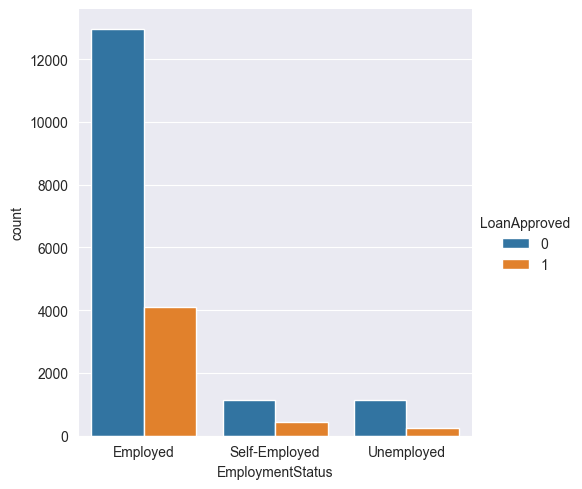

In [66]:
sns.catplot(data=df1,x="EmploymentStatus",hue="LoanApproved",kind="count")

C:\Users\Asus\Desktop\personal project\.venv\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Asus\Desktop\personal project\.venv\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


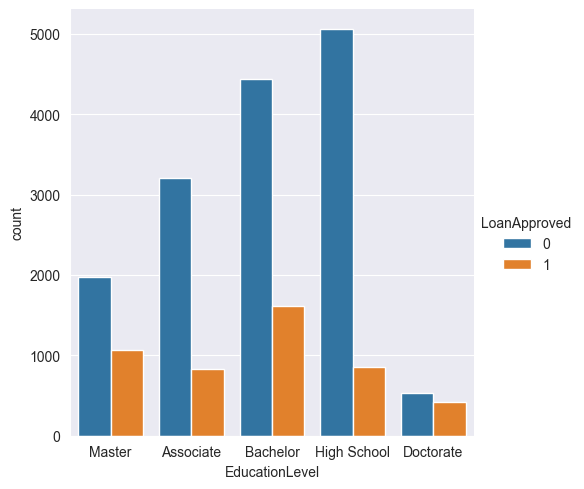

In [67]:
sns.catplot(data=df1,x="EducationLevel",hue="LoanApproved",kind="count")

C:\Users\Asus\Desktop\personal project\.venv\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Asus\Desktop\personal project\.venv\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


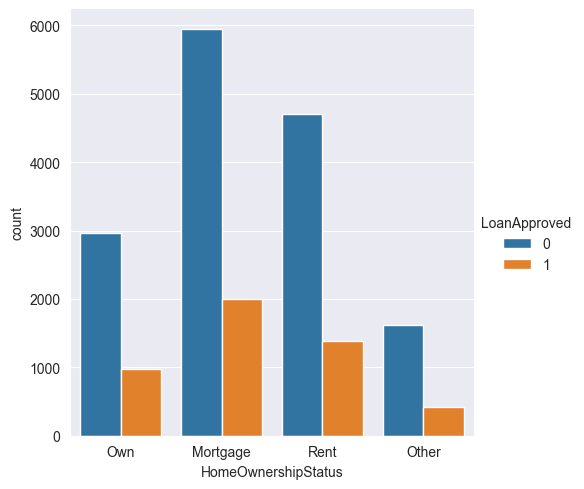

In [68]:

sns.catplot(data=df1, x="HomeOwnershipStatus",hue="LoanApproved",kind="count")

C:\Users\Asus\Desktop\personal project\.venv\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Asus\Desktop\personal project\.venv\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


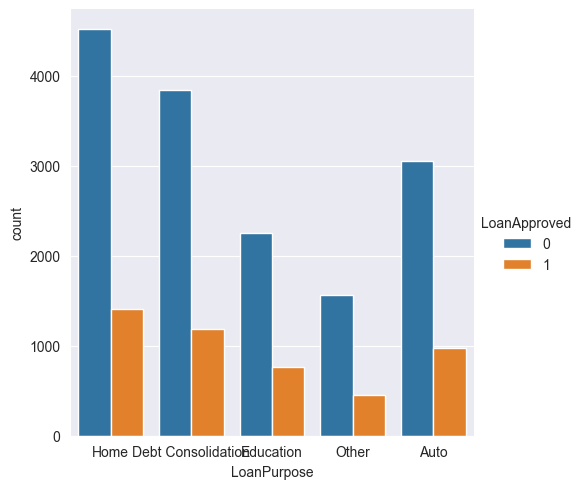

In [69]:
sns.catplot(data=df1, x="LoanPurpose",hue="LoanApproved",kind="count")

In [70]:
catergorlog=["EmploymentStatus","EducationLevel","HomeOwnershipStatus","MaritalStatus","LoanPurpose"]
catergorical_data=df1[catergorlog]
numberical_data=df1.drop(catergorlog,axis=1)

In [71]:
encoder=OneHotEncoder()
encoded_data=encoder.fit_transform(catergorical_data)
encoded_data=encoded_data.toarray()
encoded_data

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [72]:
numberical_data.head()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,45,39948,617,22,13152,48,2,183,0.354418,1,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,38,39709,628,15,26045,48,1,496,0.087827,5,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,47,40724,570,26,17627,36,2,902,0.137414,2,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,58,69084,545,34,37898,96,1,755,0.267587,2,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,37,103264,594,17,9184,36,1,274,0.320535,0,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [73]:
final_data=pd.concat([pd.DataFrame(encoded_data),numberical_data],axis=1)
final_data.drop(["LoanApproved","RiskScore"],axis=1,inplace=True)
correlation_matrix=numberical_data.corr()

In [74]:
num_data1=numberical_data.columns[:10]
num_data2=numberical_data.columns[10:20]
num_data3=numberical_data.columns[20:28]
last_2_features=numberical_data.columns[28:]

In [75]:
subset_1 = correlation_matrix.loc[list(num_data1) + list(last_2_features), list(num_data1) + list(last_2_features)]
subset_2 = correlation_matrix.loc[list(num_data2) + list(last_2_features), list(num_data2) + list(last_2_features)]
subset_3 = correlation_matrix.loc[list(num_data3) + list(last_2_features), list(num_data3) + list(last_2_features)]



<Axes: >

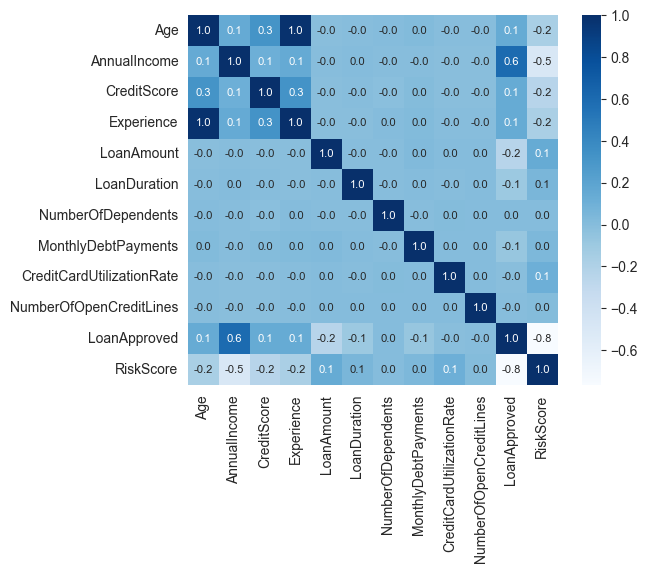

In [76]:

sns.heatmap(subset_1,cbar=True,square=True,  fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

<Axes: >

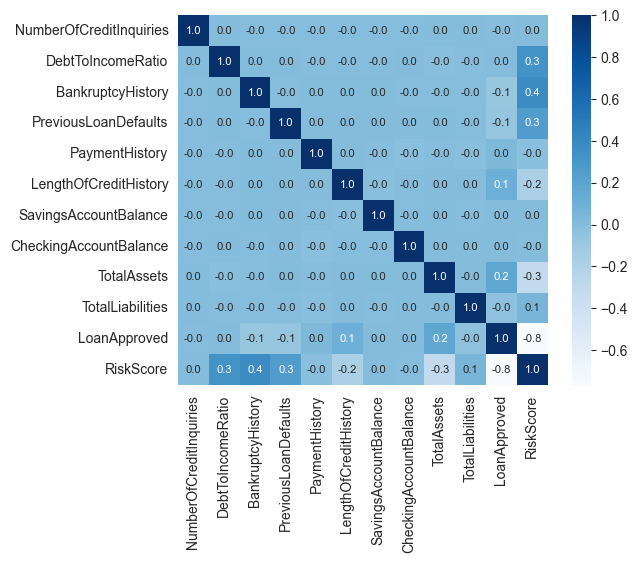

In [77]:

sns.heatmap(subset_2,cbar=True,square=True,  fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

<Axes: >

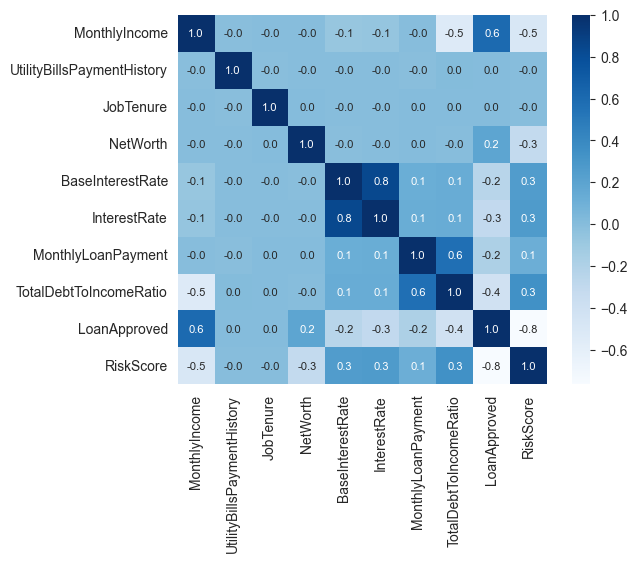

In [78]:
sns.heatmap(subset_3,cbar=True,square=True,  fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

In [79]:
X=final_data.to_numpy()

Y1=df1["RiskScore"].to_numpy()


In [80]:
STD=StandardScaler()
X=STD.fit_transform(X)


In [81]:
X_train,X_test,y_train,y_test=train_test_split(X,Y1,test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [82]:
from keras_tuner import Hyperband
import keras


In [83]:
def build_model(hp):
    model=keras.Sequential()
    for i in range(hp.Int("num_layers",1,5)):
        units=hp.Int("units"+str(i),min_value=6,max_value=128,step=16)
        l1_lambda=hp.Choice("L1_lambda_"+str(i),[0.001,0.01,0.1,1.0,10.0])
        model.add(keras.layers.Dense(units=units,activation='relu',kernel_regularizer=keras.regularizers.L1(l1_lambda)))
    model.add(keras.layers.Dense(1,activation='linear'))
    model.compile(loss='mse',optimizer='adam')
    return model

In [84]:
tuner=Hyperband(build_model, objective='val_loss', 
                  max_epochs=50,
                  factor=3,
                  directory='my_dir',
                  project_name='intro_to_kt')
tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val))
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

Reloading Tuner from my_dir\intro_to_kt\tuner0.json


In [85]:
print(f"Số layers tốt nhất: {best_hps.get('num_layers')}")
for i in range(best_hps.get('num_layers')):
    print(f"Số units của layer {i+1}: {best_hps.get('units' + str(i))}")
    print(f"L1_lambda của layer {i+1}: {best_hps.get('L1_lambda_' + str(i))}")

Số layers tốt nhất: 5
Số units của layer 1: 118
L1_lambda của layer 1: 0.01
Số units của layer 2: 70
L1_lambda của layer 2: 1.0
Số units của layer 3: 54
L1_lambda của layer 3: 0.01
Số units của layer 4: 6
L1_lambda của layer 4: 0.01
Số units của layer 5: 86
L1_lambda của layer 5: 0.01


In [86]:
Model=build_model(best_hps)


In [87]:
Model.fit(X_train,y_train,epochs=100)

Epoch 1/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 1395.0020
Epoch 2/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 64.6260
Epoch 3/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - loss: 33.4858
Epoch 4/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 25.7686
Epoch 5/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 22.4929
Epoch 6/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 20.4304
Epoch 7/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 18.6280
Epoch 8/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 17.3039
Epoch 9/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 16.7833
Epoch 10/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 15.4347
Epoch 11/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 14.3576
Epoch 12/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13.2896
Epoch 13/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13.0488
Epoch 14/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11.9281
Epoch 15/100
400/400 ━━━━

In [88]:
y_pred = Model.predict(X_test)


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [101]:
Model.evaluate(X_test,y_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 946us/step - loss: 6.8328


6.5676422119140625

In [100]:
mse = keras.metrics.mean_squared_error(y_test, y_pred)
mse_value = tf.reduce_mean(mse)
mse_value.numpy()

4.138818

In [91]:
# keras.saving.save_model(Model,"my_model_regression.h5")

In [92]:
Xc=pd.concat([final_data,df["RiskScore"]],axis=1)
Xc=Xc.to_numpy()
Yc=df["LoanApproved"].to_numpy()


In [93]:
Xc=StandardScaler().fit_transform(Xc)
Xc_train,Xc_test,Yc_train,Yc_test = train_test_split(Xc,Yc,test_size=0.2,random_state=42)
Xc_train,Xc_val,Yc_train,Yc_val = train_test_split(Xc_train,Yc_train,test_size=0.2,random_state=42)


In [94]:
def build_model_cls(hp):
    model=keras.Sequential()
    for i in range(hp.Int("num_layers",1,3)):
        units=hp.Int("units"+str(i),min_value=16,max_value=64,step=16)
        l1_lambda=hp.Choice("L1_lambda_"+str(i),[0.001,0.01,0.1,1.0])
        model.add(keras.layers.Dense(units=units,activation='relu',kernel_regularizer=keras.regularizers.L1(l1_lambda)))
        dropout_rate = hp.Float("dropout_" + str(i), min_value=0.1, max_value=0.7, step=0.1)
        model.add(keras.layers.Dropout(rate=dropout_rate))
    model.add(keras.layers.Dense(1,activation='sigmoid'))
    model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])
    return model


In [95]:
tuner=Hyperband(build_model_cls, objective='val_accuracy',max_epochs=50,factor=3)
tuner.search(Xc_train, Yc_train, epochs=50, validation_data=(Xc_val, Yc_val))
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

Reloading Tuner from .\untitled_project\tuner0.json


In [96]:
Model_cls=build_model_cls(best_hps)

Epoch 1/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8093 - loss: 0.7403 - val_accuracy: 0.9912 - val_loss: 0.3189
Epoch 2/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9881 - loss: 0.3009 - val_accuracy: 0.9987 - val_loss: 0.2011
Epoch 3/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9969 - loss: 0.1902 - val_accuracy: 0.9994 - val_loss: 0.1274
Epoch 4/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9969 - loss: 0.1230 - val_accuracy: 0.9994 - val_loss: 0.0831
Epoch 5/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9980 - loss: 0.0849 - val_accuracy: 0.9994 - val_loss: 0.0624
Epoch 6/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9965 - loss: 0.0676 - val_accuracy: 0.9994 - val_loss: 0.0497
Epoch 7/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.9978 - loss: 0.0563 - val_accuracy: 1.0000 - val_loss: 0.0432
Epoch 8/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9976 - loss: 0.0507 - val_ac

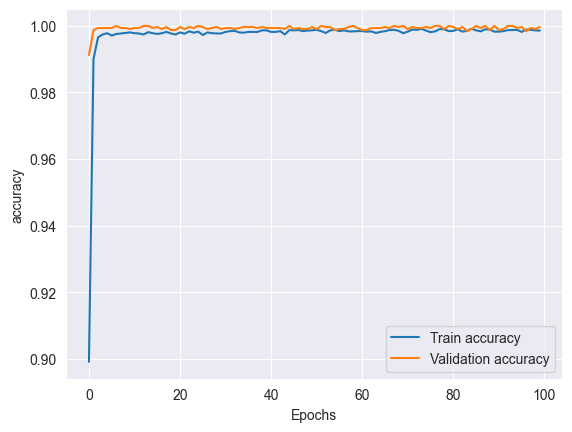

In [97]:
history=Model_cls.fit(Xc_train,Yc_train,validation_data=(Xc_val,Yc_val),epochs=100)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [98]:
Model_cls.fit(Xc_train,Yc_train,validation_data=(Xc_val,Yc_val),epochs=20)

Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9980 - loss: 0.0243 - val_accuracy: 0.9997 - val_loss: 0.0174
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9988 - loss: 0.0207 - val_accuracy: 0.9994 - val_loss: 0.0186
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9988 - loss: 0.0199 - val_accuracy: 0.9991 - val_loss: 0.0210
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9980 - loss: 0.0233 - val_accuracy: 0.9997 - val_loss: 0.0178
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9994 - loss: 0.0191 - val_accuracy: 0.9997 - val_loss: 0.0176
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9988 - loss: 0.0210 - val_accuracy: 0.9994 - val_loss: 0.0182
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9988 - loss: 0.0208 - val_accuracy: 0.9994 - val_loss: 0.0185
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9985 - loss: 0.0219 - val_accuracy: 0.

In [99]:
Model_cls.evaluate(Xc_test,Yc_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - accuracy: 0.9985 - loss: 0.0195


[0.018593478947877884, 0.9994999766349792]